<a href="https://colab.research.google.com/github/bforoura/GENAI26/blob/main/Module2/Chatbot_Long_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chat Interface with Long-Term Memroy**

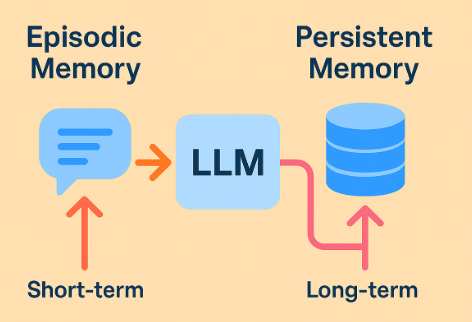

In [ ]:
# Install the needed libraries
!pip install -qU langchain-google-genai

# The SQL memory features
!pip install -U langchain-community

# **Transition from Short-Term to Long-Term Memory**

* In the short-term memory notebook, if we stopped the program and restarted it, the **chat_history** list would be empty and the AI would forget everything.

* Using **SQLChatMessageHistory** ensures the conversation survives even if we turn off the computer.

* **connection_string="sqlite:///joke_factory.db**
   * This tells the program to create a **SQLite Database** file on the computer named **joke_factory.db**
   
   * Before, memory was stored in a **Python list (temporary)**
   
   * But now, memory is stored in a **database file (permanent)**

* **session_id**
   * This is like a label on a folder.
   * If we set the ID to **science_comedian_v1**, the database saves all messages under that **folder**

---
* The best part of using **SQLChatMessageHistory** is that we no longer need to manually manage the list.

  * When we add a message, it is instantly written to the .db file.

  * When we start the program, it automatically reads the old messages from the .db file into the AI's context.

  ---
* **About SQLite**
   * Unlike MySQL, SQLite doesn't have a separate server process.
   
   * There is no **installing** a database service.
   
   * It is a library that is built-in to Python.
   
   * When we specify a filename such as **joke_factory.db**, the database engine simply starts running inside yotheur code

   * The entire database—including all tables, indexes, and the chat history—is stored in one single cross-platform file.

   * In production environments, LLMs use MySQL for **Long-Term Memory** primarily to handle scale and structured data.

   * If we want to build a **Gym Bot**  used by 5,000 people, we can't have 5,000 different .db files floating around. MySQL allows us to store every user's chat history in one massive table, using a user_id column to keep them separate.


  ---


In [ ]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage
from langchain_community.chat_message_histories import SQLChatMessageHistory

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    temperature=1.0
)

# 2. Setup Persistent Long-Term Memory
# 'session_id' allows you to have multiple different chats in one database
# 'connection_string' creates a local file named 'joke_factory.db'
session_id = "science_comedian_v1"
chat_history = SQLChatMessageHistory(
    session_id=session_id,
    connection_string="sqlite:///joke_factory.db"
)

# 3. Handle the System Persona
# Since the DB might already have messages, we only add the SystemMessage
# if the history is empty.
if not chat_history.messages:
    chat_history.add_message(SystemMessage(content="You are a witty comedian who specializes in science jokes."))

print(f"--- Science Comedian Bot (Session: {session_id}) ---")
print(f"--- {len(chat_history.messages)} messages loaded from memory ---")

# 4. The Chat Loop
while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Comedian: I'm 'splitting' like an atom! Goodbye!")
        break

    # Add user's message to the SQLite database
    chat_history.add_user_message(user_input)

    # Get the AI response
    # We pass the ENTIRE history from the database to Gemini
    response = llm.invoke(chat_history.messages)
    ai_text = response.content[0]['text']

    print(f"Comedian: {ai_text}")

    # Save the AI's response to the SQLite database
    chat_history.add_ai_message(ai_text)



--- Science Comedian Bot (Session: science_comedian_v1) ---
--- 5 messages loaded from memory ---
You: That's not funny.
Comedian: Ouch. My ego is currently undergoing **nuclear fission**—it’s breaking apart and releasing a lot of heat, but clearly no light.

I should have known. My jokes are like **neutrinos**: they have almost no mass, and they’re passing right through you without any interaction whatsoever. 

I’m basically a **failed hypothesis** at this point. I keep testing these variables, but the results are always "null." It’s statistically significant how much you’re not laughing. 

Tell you what, I’ll check my **calibration**. I don’t want to be like **dark matter**—taking up all the space in the conversation while remaining completely invisible and impossible to detect. 

Is it the **frequency**? Maybe I’m just broadcasting at a wavelength your funny bone can’t resonate with. Or perhaps you’re just a **superconductor** and you’re offering zero resistance to my failure?

I’d 

# **Google Drive Persistence**

* By default, Colab files are deleted when you close the tab.

* To make this memory truly permanent by surviving even Colab timeouts, **mount** your Google Drive and **change the connection string**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change connection string to save inside your Drive
chat_history = SQLChatMessageHistory(
    session_id=session_id,
    connection_string="sqlite:////content/drive/MyDrive/joke_factory.db"
)